# Video: Data Approximations using Orthogonal Bases

This video shows how a generic data approximation method using orthogonal bases.

## Data Approximations using Orthogonal Bases

* Coordinates can be used to reconstruct vectors.
* Can we use partial coordinates to approximate vectors?
  * If we "lose" one of the coordinates, can we still make a vector close to the original?
  * Why would we do that?


Script:
* One thing that data scientists tend to do with data is think about ways to simplify it.
* Can we boil it down to a smaller of data columns or dimensions that capture the essence well enough?
* Vector space coordinates are a version of this.
* They reduced the full vector in $\mathbb{R}^n$ do the $\mathbb{R}^k$ where $k$ is the vector space dimension.
* Can we take it farther?
* What if we only used half the coordinates?
* Could we approximate the data well enough?

## How Do We Compensate for Missing Coordinates?

Idea: use the average value for that coordinate from the whole dataset.


Script:
* Are there any interactions that we should care about?
* Will using the average pick a value in the middle of the points matching the known coordinates?
* This is very distribution dependent.


## How Do We Represent This Point with These Vectors?


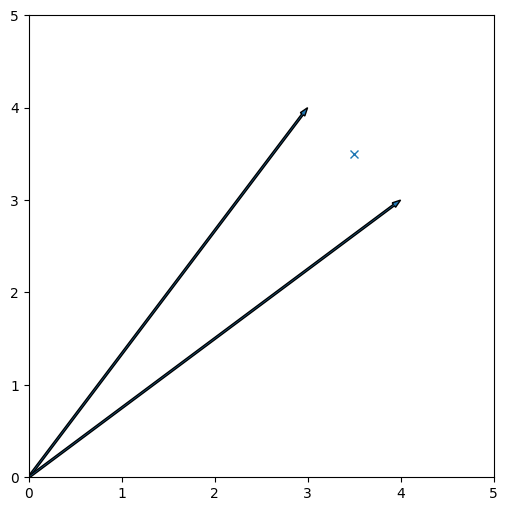

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

plt.gca().set_xlim(0, 5)
plt.gca().set_ylim(0, 5)

plt.plot([3.5], [3.5], "x")

plt.arrow(0, 0, 3, 4, length_includes_head = True, width=0.02)
plt.arrow(0, 0, 4, 3, length_includes_head = True, width=0.02)

None

Script:
* Imagine these two vectors are the basis of a vector space.
* How do we represent the vector marked with an x?

## Coordinates Using Non-Orthogonal Basis Vectors


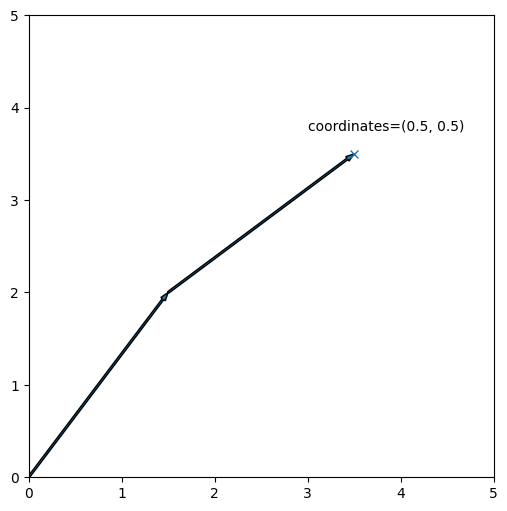

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

plt.gca().set_xlim(0, 5)
plt.gca().set_ylim(0, 5)

plt.plot([3.5], [3.5], "x")

plt.arrow(0, 0, 1.5, 2.0, length_includes_head = True, width=0.02)
plt.arrow(1.5, 2.0, 2.0, 1.5, length_includes_head = True, width=0.02)

plt.annotate("coordinates=(0.5, 0.5)", (3, 3.75))

None

Script:
* This point was chosen to be the average of the basis vectors, so it's coordinates are (1/2, 1/2).
* What if we limit ourselves to not using the whole basis?

## Partial Coordinates Using Non-Orthogonal Basis Vectors


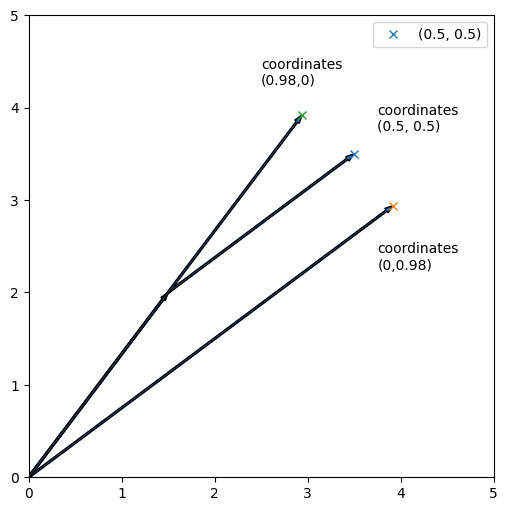

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

plt.gca().set_xlim(0, 5)
plt.gca().set_ylim(0, 5)

plt.plot([3.5], [3.5], "x", label=(0.5, 0.5))

plt.arrow(0, 0, 1.5, 2.0, length_includes_head = True, width=0.02)
plt.arrow(1.5, 2.0, 2.0, 1.5, length_includes_head = True, width=0.02)
plt.annotate("coordinates\n(0.5, 0.5)", (3.75, 3.75))

scale = (2 * 3.5 * 3.5) / (4**2 + 3**2)

plt.arrow(0, 0, scale * 4, scale * 3, length_includes_head = True, width=0.02)
plt.plot(scale * 4, scale * 3, "x")
plt.annotate(f"coordinates\n(0,{scale:.2f})", (3.75, 2.25))

plt.arrow(0, 0, scale * 3, scale * 4, length_includes_head = True, width=0.02)
plt.plot(scale * 3, scale * 4, "x")
plt.annotate(f"coordinates\n({scale:.2f},0)", (2.5, 4.25))

plt.legend()

None


Script:
* If we just use the first basis vector, then the coordinates for the closest vector to the target are approximately (0.98, 0).
* If we just use the second basis vector, then the coordinates for the closest vector to the target are approximately (0, 0.98).
* So the best approximation depends on which vectors are allowed.
* In this case, the basis vectors have a high cosine similarity of 96%, so they are able to compensate for each other to a degree.
* In some ways, that may be convenient, but it at least complicates the partial coordinate story.

## Advantages of Orthogonal Bases

* If the basis is orthogonal, then each coordinate is calculated independently.
* If some coordinates are "lost", the best values for the other coordinates remain the same.
* Default placeholder would be average of that coordinate.
  * This is also the corresponding coordinate of the dataset average.


Script:
* A big convenience of orthogonal bases is that you cannot trade off coordinates like in the previous example.
* That does lose redundancy, but you get a simpler optimal coordinate choice.
* Coordinates are calculated the same way regardless of which are kept or thrown away.
* Then if you want to reconstruct the original vectors, usually the dataset average is used.
* Or, the whole dataset might be shifted so each column has average zero.

## Principal Components Analysis in Context

* Principal components analysis picks to optimize $L_2$ reconstruction losses.
  * Principal components are orthogonal.
  * Greedy choices make any prefix of principal components optimal.
  * Principal components do not need to be tweaked for a particular prefix length (number of coordinates kept).


Script:
* Principal component analysis is the poster child for reconstructing data from a partial set of components.
* By construction, principal components have an orthogonal basis.
* And the principal components are chosen greedily so that which ever number of coordinates you want to keep, that prefix of principal components is always the best choice.
* That is best using $L_2$ reconstruction losses, and it is the best over all bases of the same dimension, orthogonal or otherwise.